In [1]:
import pandas as pd
from dynrat.timeseries import ComputedDischargeTimeSeries, MeasuredStageTimeSeries, ObservedDischargeTimeSeries, ObservedStageTimeSeries


stage_path = 'data/stagedischarge/stage.csv'
stage_data = pd.read_csv(stage_path, index_col='DateTime', squeeze=True, parse_dates=True)
measured_stage = MeasuredStageTimeSeries(stage_data, freq=15*60)

flow_path = 'data/stagedischarge/flow.csv'
flow_data = pd.read_csv(flow_path, index_col='DateTime', squeeze=True, parse_dates=True)
computed_flow = ComputedDischargeTimeSeries(flow_data, freq=15*60)

obs_stage_path = 'data/stagedischarge/obs_stage.csv'
obs_stage_data = pd.read_csv(obs_stage_path, index_col='DateTime', squeeze=True, parse_dates=True)
obs_stage = ObservedStageTimeSeries(obs_stage_data)

obs_flow_path = 'data/stagedischarge/obs_flow.csv'
obs_flow_data = pd.read_csv(obs_flow_path, index_col='DateTime', squeeze=True, parse_dates=True)
obs_flow = ObservedDischargeTimeSeries(obs_flow_data)

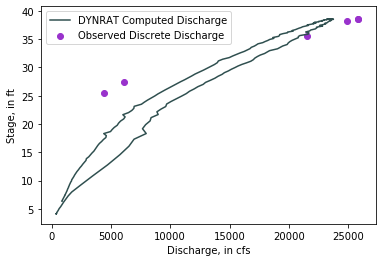

In [2]:
from dynrat.plot import stage_discharge_plot


ax = stage_discharge_plot(measured_stage, computed_flow, label='DYNRAT Computed Discharge')
_ = stage_discharge_plot(obs_stage, obs_flow, ax=ax)

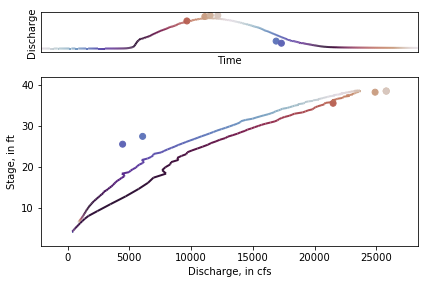

In [3]:
from dynrat.plot import multicolor_h_vs_q


_ = multicolor_h_vs_q(measured_stage, computed_flow, obs_data=(obs_stage, obs_flow), periods=2)